# $c_6$-dependence of $gg(\rightarrow h^{\ast})\rightarrow ZZ$ process

In [1]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# helper functions

def solve_polynomial_coefficients(x, y):
  """
  Finds the coefficients of the polynomial that fits the given (x, y) coordinates.

  Parameters:
  x (array-like): An array of x coordinates.
  y (array-like): An array of y coordinates.

  Returns:
  numpy.ndarray: The coefficients of the polynomial.
  """
  # Ensure x and y are numpy arrays
  x = np.array(x)
  y = np.array(y)
  
  # Number of points
  N = len(x) - 1
  
  # Construct the Vandermonde matrix
  V = np.vander(x, N+1, increasing=True)
  
  # Solve for the polynomial coefficients
  coefficients = np.linalg.solve(V, y)
  
  return coefficients

def polynomial(coeffs):
  """
  Construct a polynomial over a domain.

  Parameters:
  coeffs (array-like): polynomial coefficients.

  Returns:
  Callable: Invoke with the the domain to get values of the polynomial function over it.
  """
  def polynomial(x):
    return sum(c * x**i for i, c in enumerate(coeffs))
  return polynomial

In [21]:
# read events of each sample
samples = {
  'ggZZ_all' : '/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4e_all/events.csv',
  # 'gghZZ_hpi' : '/u/taepa/hstar/data/samples/gghZZ_hpi/events.csv',
  # 'gghZZ_int' : '/u/taepa/hstar/data/samples/gghZZ_int/events.csv',
  # 'ggZZ_box' : '/u/taepa/hstar/data/samples/ggZZ_box/events.csv'
}
for proc, filepath in samples.items():
  samples[proc] = pd.read_csv(filepath,nrows=10000)

# normalize correctly by each sample's physics cross-section over sum of weights
xsec = {
  'ggZZ_all' : 1.4787447,
  # 'gghZZ_hpi' : -0.65884676E-01,
  # 'gghZZ_int' : -0.15423119,
  # 'ggZZ_box' : 1.5454565
}
for proc, events in samples.items():
  events['wt_norm'] = events['wt'] / np.sum(events['wt']) * xsec[proc]

# these were the c6 values generated by MCFM
c6_values_mcfm = np.arange(-10.0, 11.0, 1.0)

## Validation: $ |\mathcal{M}_{ZZ} + \\\\mathcal{M}_h|^2 = |\mathcal{M}_{ZZ}|^2 + |\mathcal{M}_h|^2 + 2\mathrm{Re}(\mathcal{M}_{ZZ}^{\dag}\mathcal{M}_{h})$

In [22]:
random_event_index = 112

## Higgs+interference

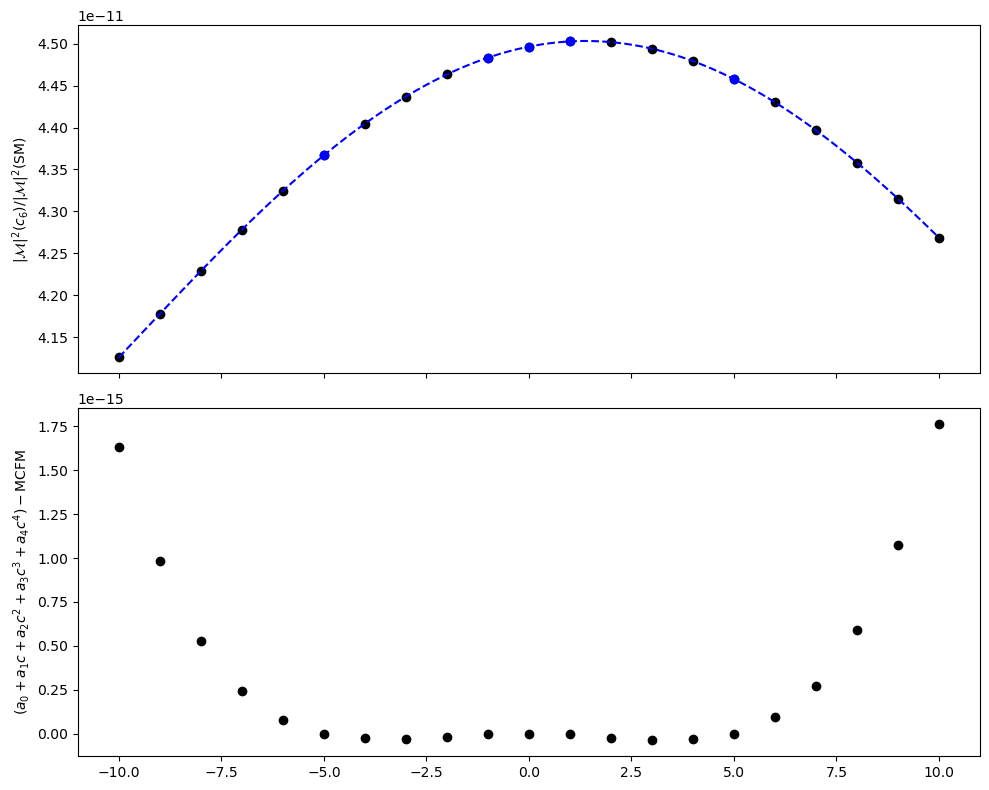

In [23]:
events = samples['ggZZ_all']

c6_impacts_mcfm = np.array([events[f'msq_sbi_c6_{i}'][random_event_index] for i in np.arange(1,len(c6_values_mcfm)+1,1)])

# take 5 points to solve quartic
c6_points = np.array([-5, -1, 0, 1, 5])
c6_indices = np.searchsorted(c6_values_mcfm, c6_points, side='left') + 1
c6_impacts = np.array([events[f'msq_sbi_c6_{i}'][random_event_index] for i in c6_indices])

# solve
param_coeffs = solve_polynomial_coefficients(c6_points, c6_impacts)

# check for closure with all points
c6_domain = np.linspace(-10,10,100)
c6_param = polynomial(param_coeffs)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

ax1.plot(c6_values_mcfm, c6_impacts_mcfm, linestyle='none', marker='o', color='black', label='MCFM')
ax1.plot(c6_points, c6_impacts, linestyle='none', marker='o', color='blue', label='solution')
ax1.plot(c6_domain, c6_param(c6_domain), linestyle='--', color='blue', label='parametrization')
ax1.set_ylabel("$|\\mathcal{M}|^2 (c_6) / |\\mathcal{M}|^2 (\\mathrm{SM})$")

ax2.plot(c6_values_mcfm, c6_impacts_mcfm - c6_param(c6_values_mcfm), marker='o', linestyle='none', color='black')
ax2.set_ylabel("$(a_0 + a_1 c + a_2 c^2 + a_3 c^3 + a_4 c^4)- \\mathrm{MCFM}$")

plt.tight_layout()
plt.show()

Note that (almost) all events in "Higgs+interference" or "interference" sample are unphysical negative weights. Hence, their parametrization trending "downwards" is actually a positive contribution to the total cross-section. This can be seen by parametrizing the physical-and-inclusive `"ggZZ_all"` sample instead (simply switch out the `events` at the top of the code snippet).

It can be seen that using 5 d.o.f.s in the polynomial, i.e. a quartic one, is needed to fully solve the $c_6$-dependence. Note that values up to $|c_6| \geq 5.0$ were used, but the parametrization captures the full dependence out to $|c_6| = 10.0$ (up to numerical precision).

# Interference-only

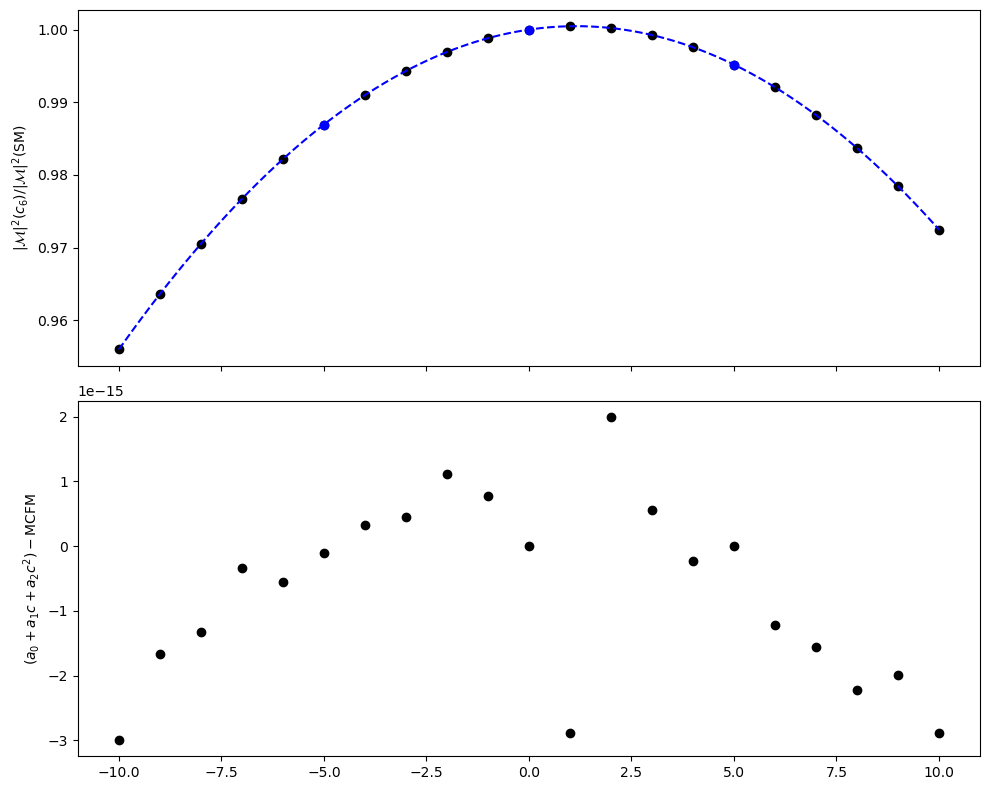

In [195]:
c6_impacts_mcfm = np.array([events[f'rwt_{i}'][random_event_index] for i in np.arange(1,len(c6_values_mcfm)+1,1)])

# take 5 points to solve quartic
c6_points = np.array([-5, 0, 5])
c6_indices = np.searchsorted(c6_values_mcfm, c6_points, side='left') + 1
c6_impacts = np.array([events[f'rwt_{i}'][random_event_index] for i in c6_indices])

# solve
param_coeffs = solve_polynomial_coefficients(c6_points, c6_impacts)

# check for closure with all points
c6_domain = np.linspace(-10,10,100)
c6_param = polynomial(param_coeffs)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

ax1.plot(c6_values_mcfm, c6_impacts_mcfm, linestyle='none', marker='o', color='black', label='MCFM')
ax1.plot(c6_points, c6_impacts, linestyle='none', marker='o', color='blue', label='solution')
ax1.plot(c6_domain, c6_param(c6_domain), linestyle='--', color='blue', label='parametrization')
ax1.set_ylabel("$|\mathcal{M}|^2 (c_6) / |\mathcal{M}|^2 (\mathrm{SM})$")

ax2.plot(c6_values_mcfm, c6_impacts_mcfm - c6_param(c6_values_mcfm), marker='o', linestyle='none', color='black')
ax2.set_ylabel("$(a_0 + a_1 c + a_2 c^2)- \mathrm{MCFM}$")

plt.tight_layout()
plt.show()

There seems to be a small domain $(c_6 > 0)$ overwhich the dependence exhibits (still within numerical precision) non-polynomial behvaiour. Use `random_event_index = 999` for example.

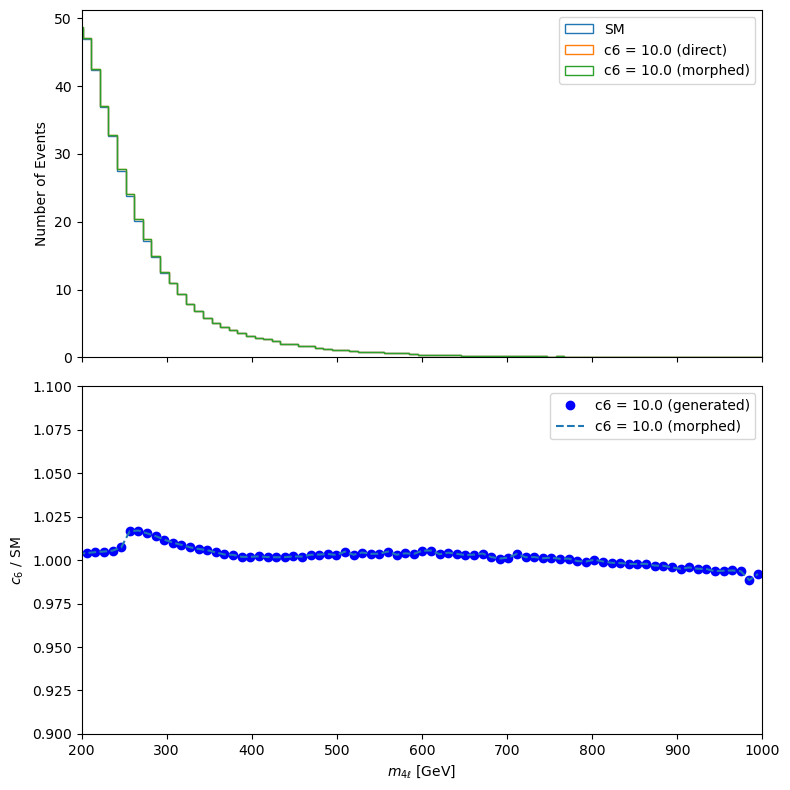

In [ ]:
# both are at c6 = 10.0
c6_generated_weights = events[sample.weight_key] * events['rwt_21']
c6_morphed_weights = c6_weights[:,0]

# Creating the subplots (2x1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

m4l_bins = np.linspace(100, 1000, 90)

# Top panel: plot the histograms for the SM and c6_weights
sm_yield, _, _ = ax1.hist(m4l, bins=m4l_bins, 
         weights=events[sample.weight_key], histtype='step', label='SM')

c6_generated_yield, _, _ = ax1.hist(m4l, bins=m4l_bins, 
            weights=c6_generated_weights, histtype='step', label=f'c6 = 10.0 (direct)')

c6_morphed_yield, _, _ = ax1.hist(m4l, bins=m4l_bins, 
            weights=c6_morphed_weights, histtype='step', label=f'c6 = 10.0 (morphed)')

ax1.set_xlim(200,1000)
ax1.set_ylabel('Number of Events')
ax1.legend()

# Bottom panel: plot the ratio of each c6_weights[i] / events[sample.weight_key]
c6_generated_impact = np.divide(c6_generated_yield, sm_yield, out=np.zeros_like(sm_yield), where=sm_yield!=0)
c6_morphed_impact = np.divide(c6_morphed_yield, sm_yield, out=np.zeros_like(sm_yield), where=sm_yield!=0)
# Plot the ratio

m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])  # Compute bin centers for plotting
ax2.plot(m4l_centers, c6_generated_impact, 'bo', label=f'c6 = 10.0 (generated)')
ax2.plot(m4l_centers, c6_morphed_impact, '--', label=f'c6 = 10.0 (morphed)')

ax2.set_ylim(0.9,1.1)
ax2.set_xlabel('$m_{4\ell}$ [GeV]')
ax2.set_ylabel('$c_6$ / SM')
ax2.legend()

plt.tight_layout()
plt.show()

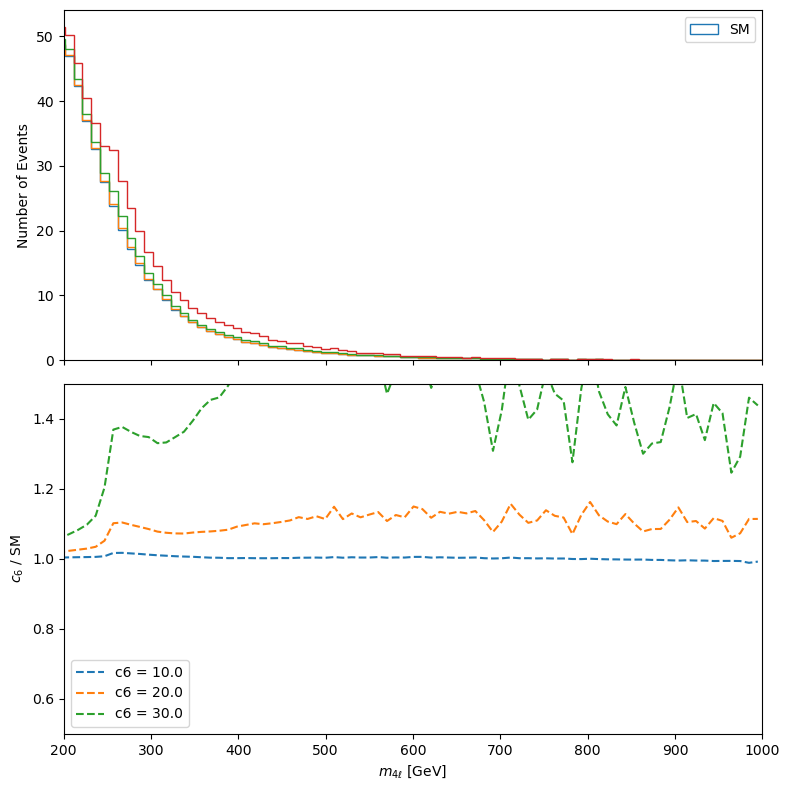

In [ ]:
# Creating the subplots (2x1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

m4l_bins = np.linspace(100, 1000, 90)

# Top panel: plot the histograms for the SM and c6_weights
sm_yield, _, _ = ax1.hist(m4l, bins=m4l_bins, 
         weights=events[sample.weight_key], histtype='step', label='SM')

ax1.set_xlim(200,1000)
ax1.set_ylabel('Number of Events')
ax1.legend()

c6_yields = []
for i, c6_value in enumerate(c6_values):
    c6_yield, _, _ = ax1.hist(m4l, bins=m4l_bins, 
             weights=c6_weights[:, i], histtype='step', label=f'c6 = {c6_value}')
    c6_yields.append(c6_yield)


# Bottom panel: plot the ratio of each c6_weights[i] / events[sample.weight_key]
for i, c6_value in enumerate(c6_values):
    ratio = np.divide(c6_yields[i], sm_yield, out=np.zeros_like(sm_yield), where=sm_yield!=0)
    # Plot the ratio
    m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])  # Compute bin centers for plotting
    ax2.plot(m4l_centers, ratio, '--', label=f'c6 = {c6_value}')

ax2.set_ylim(0.25,1.75)
ax2.set_xlabel('$m_{4\ell}$ [GeV]')
ax2.set_ylabel('$c_6$ / SM')
ax2.legend()

plt.tight_layout()
plt.show()